# Regularized Logistic Regression

...

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data and peek at first 5 rows
filepath = os.getcwd() + '/logReg_data2.txt'
data = pd.read_csv(filepath, names = ['test1', 'test2', 'accepted'])
data.head()

test1    test2  accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

### Scatterplot

...

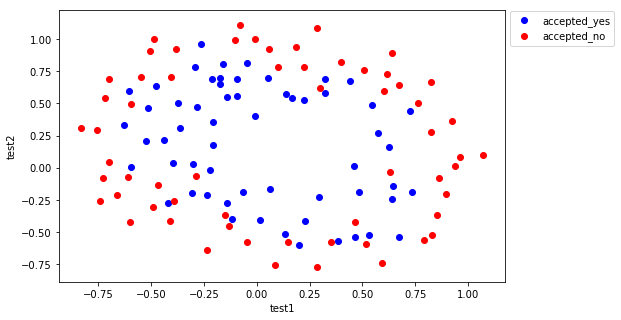

In [3]:
# split the data into accepted_yes and accepted_no
accepted_yes = data[ data.accepted == 1 ]
accepted_no = data[ data.accepted == 0 ]

# plot the training data
fig, ax = plt.subplots(figsize = (8,5))
plt.scatter(accepted_yes.test1, accepted_yes.test2, color = 'blue', label = 'accepted_yes')
plt.scatter(accepted_no.test1, accepted_no.test2, color = 'red', label = 'accepted_no')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend(bbox_to_anchor = (1,0.85), loc = 3)
plt.show()

### Feature Mapping

...

In [4]:
def map_features(df, degree):
    '''Map the 2-dimensional feature space into a higher dimensional
    feature space consisting of polynomial terms up to the given degree.
    Inputs:
    df is a dataframe representing the feature matrix
    degree is the highest order of the polynomial terms'''
    
    X10 = df.iloc[:, 0]
    X01 = df.iloc[:, 1]
    df_new = df.copy(deep = True)
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            # make new columns in the dataframe for each polynomial term
            df_new['X{}{}'.format(i-j,j)] = np.power(X10, i-j) * np.power(X01, j)
    
    return df_new

# perform feature mapping on the dataframe from above
data_new = map_features(data, 6)
data_new.head()            

test1    test2  accepted       X10      X01       X20       X11  \
0  0.051267  0.69956         1  0.051267  0.69956  0.002628  0.035864   
1 -0.092742  0.68494         1 -0.092742  0.68494  0.008601 -0.063523   
2 -0.213710  0.69225         1 -0.213710  0.69225  0.045672 -0.147941   
3 -0.375000  0.50219         1 -0.375000  0.50219  0.140625 -0.188321   
4 -0.513250  0.46564         1 -0.513250  0.46564  0.263426 -0.238990   

        X02       X30       X21    ...          X23       X14       X05  \
0  0.489384  0.000135  0.001839    ...     0.000900  0.012278  0.167542   
1  0.469143 -0.000798  0.005891    ...     0.002764 -0.020412  0.150752   
2  0.479210 -0.009761  0.031616    ...     0.015151 -0.049077  0.158970   
3  0.252195 -0.052734  0.070620    ...     0.017810 -0.023851  0.031940   
4  0.216821 -0.135203  0.122661    ...     0.026596 -0.024128  0.021890   

            X60           X51       X42       X33       X24       X15  \
0  1.815630e-08  2.477505e-07  0.000003  0.000046  0.000629  0.008589   
1  6.362953e-07 -4.699318e-06  0.000035 -0.000256  0.001893 -0.013981   
2  9.526844e-05 -3.085938e-04  0.001000 -0.003238  0.010488 -0.033973   
3  2.780914e-03 -3.724126e-03  0.004987 -0.006679  0.008944 -0.011978   
4  1.827990e-02 -1.658422e-02  0.015046 -0.013650  0.012384 -0.011235   

        X06  
0  0.117206  
1  0.103256  
2  0.110047  
3  0.016040  
4  0.010193  

[5 rows x 30 columns]

In [5]:
# drop the test1, test2 columns since they are the same as X10, X01
data_new.drop('test1', axis=1, inplace=True)
data_new.drop('test2', axis=1, inplace=True)

# insert 'ones' column after 'accepted'
data_new.insert(1, 'ones', 1)
data_new.head()

accepted  ones       X10      X01       X20       X11       X02       X30  \
0         1     1  0.051267  0.69956  0.002628  0.035864  0.489384  0.000135   
1         1     1 -0.092742  0.68494  0.008601 -0.063523  0.469143 -0.000798   
2         1     1 -0.213710  0.69225  0.045672 -0.147941  0.479210 -0.009761   
3         1     1 -0.375000  0.50219  0.140625 -0.188321  0.252195 -0.052734   
4         1     1 -0.513250  0.46564  0.263426 -0.238990  0.216821 -0.135203   

        X21       X12    ...          X23       X14       X05           X60  \
0  0.001839  0.025089    ...     0.000900  0.012278  0.167542  1.815630e-08   
1  0.005891 -0.043509    ...     0.002764 -0.020412  0.150752  6.362953e-07   
2  0.031616 -0.102412    ...     0.015151 -0.049077  0.158970  9.526844e-05   
3  0.070620 -0.094573    ...     0.017810 -0.023851  0.031940  2.780914e-03   
4  0.122661 -0.111283    ...     0.026596 -0.024128  0.021890  1.827990e-02   

            X51       X42       X33       X24       X15       X06  
0  2.477505e-07  0.000003  0.000046  0.000629  0.008589  0.117206  
1 -4.699318e-06  0.000035 -0.000256  0.001893 -0.013981  0.103256  
2 -3.085938e-04  0.001000 -0.003238  0.010488 -0.033973  0.110047  
3 -3.724126e-03  0.004987 -0.006679  0.008944 -0.011978  0.016040  
4 -1.658422e-02  0.015046 -0.013650  0.012384 -0.011235  0.010193  

[5 rows x 29 columns]

### The Regularized Cost Function

...

In [6]:
def regularized_logReg_cost(theta, X, y, lambda_):
    '''Compute the regularized cost funtion.  This is almost the same as
    logReg_cost() from before, but now we're adding a regularization term.'''
    
    from log_reg_scripts import logReg_cost
    
    unreg_cost = logReg_cost(theta, X, y)
    # convert theta back to a numpy array since logReg_cost converts it to a numpy matrix
    theta = np.array(theta)
    reg_term = lambda_ / (2*len(y)) * sum(theta[1:]**2) 
    return unreg_cost + reg_term

In [7]:
# get the feature matrix X, target vector y, and initialize theta to all zeros
# must be careful with the shape of [:, 0:1] versus [:, 0] for y
X = data_new.iloc[:, 1:].values
y = data_new.iloc[:, 0:1].values
theta = np.zeros(X.shape[1])

# initialize lambda_ to 1
lambda_ = 1

In [8]:
regularized_logReg_cost(theta, X, y, lambda_)

0.69314718055994529

### The Regularized Gradient

...

In [45]:
def regularized_logReg_gradient(theta, X, y, lambda_):
    '''Compute the gradient of the regularized logistic cost function.
    We will re-use the logReg_gradient() function from before.'''
    
    from log_reg_scripts import logReg_gradient
    
    reg_gradient_0 = logReg_gradient(theta, X, y)[0,0]
    reg_gradient = logReg_gradient(theta, X, y) + (lambda_ / len(y))*theta
    reg_gradient[0,0] = reg_gradient_0
    return reg_gradient

regularized_logReg_gradient(theta, X, y, lambda_)    

array([[  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
          5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
          1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
          2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
          1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
          1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
          5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
          3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
          4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
          3.87936363e-02]])

In [46]:
def regularized_logReg_gradient2(theta, X, y, lambda_):
    '''This is a test'''
    
    pass

### Learning the Optimal Parameters

Again we will use SciPy's [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) module to find the optimal $\theta$ parameters with the [fmin_tnc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html#scipy.optimize.fmin_tnc) function.

In [39]:
from scipy.optimize import fmin_tnc

result = \
fmin_tnc( func=regularized_logReg_cost, x0=theta, fprime=regularized_logReg_gradient, args=(X,y,lambda_) )

In [40]:
result

(array([ 1.27271027,  0.62529966,  1.18111687, -2.01987399, -0.9174319 ,
        -1.43166928,  0.12393226, -0.36553118, -0.35725401, -0.17516291,
        -1.4581701 , -0.05098418, -0.61558547, -0.27469166, -1.19271296,
        -0.2421784 , -0.20603292, -0.04466179, -0.27778956, -0.29539514,
        -0.45645983, -1.04319156,  0.02779373, -0.29244877,  0.01555762,
        -0.32742408, -0.14389152, -0.92467486]), 32, 1)